In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
AdvWorksCusts = pd.read_csv('AdvWorksCusts.csv')
AdvWorksCusts.head(5)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,?,Jon,V,Yang,?,3761 N. 14th St,?,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,?,Eugene,L,Huang,?,2243 W St.,?,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,?,Ruben,?,Torres,?,5844 Linden Land,?,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,?,Christy,?,Zhu,?,1825 Village Pl.,?,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,?,Elizabeth,?,Johnson,?,7553 Harness Circle,?,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [3]:
AW_AveMonthSpend = pd.read_csv('AW_AveMonthSpend.csv')
AW_AveMonthSpend.head(5)

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [4]:
AW_BikeBuyer = pd.read_csv('AW_BikeBuyer.csv')
AW_BikeBuyer.head(5)

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [5]:
AdvWorksCusts.columns = [str.replace('-', '_') for str in AdvWorksCusts.columns]

In [6]:
(AdvWorksCusts.astype(np.object) == '?').any()

CustomerID              False
Title                    True
FirstName               False
MiddleName               True
LastName                False
Suffix                   True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool

In [7]:
AdvWorksCusts.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object

In [8]:
for col in AdvWorksCusts.columns:
    if AdvWorksCusts[col].dtype == object:
        count = 0
        count = [count + 1 for x in AdvWorksCusts[col] if x == '?']
        print(col + ' ' + str(sum(count)))

Title 16431
FirstName 0
MiddleName 6985
LastName 0
Suffix 16517
AddressLine1 0
AddressLine2 16243
City 0
StateProvinceName 0
CountryRegionName 0
PostalCode 0
PhoneNumber 0
BirthDate 0
Education 0
Occupation 0
Gender 0
MaritalStatus 0


In [9]:
AdvWorksCusts.drop('Title', axis = 1, inplace = True)
AdvWorksCusts.drop('Suffix', axis = 1, inplace = True)
AdvWorksCusts.drop('AddressLine2', axis = 1, inplace = True)
AdvWorksCusts.drop('MiddleName', axis = 1, inplace = True)

##Replace with empty string
##cols = ['MiddleName']
        
##for column in cols:
##    AdvWorksCusts.loc[AdvWorksCusts[column] == '?', column] = np.nan
##AdvWorksCusts.replace(np.nan, '', regex=True) 

AdvWorksCusts.shape    

(16519, 19)

In [10]:
AdvWorksCusts.head(5)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [11]:
df3 = pd.merge(AdvWorksCusts, AW_AveMonthSpend)
df4 = pd.merge(df3, AW_BikeBuyer)
df4.head(5)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,95,1


In [12]:
print(df4.shape)
print(df4.CustomerID.unique().shape)

(17209, 21)
(16404,)


In [13]:
df4.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(df4.shape)
print(df4.CustomerID.unique().shape)

(16404, 21)
(16404,)


In [14]:
print(df4.AveMonthSpend.min())
print(df4.AveMonthSpend.max())

22
176


In [15]:
print(df4.AveMonthSpend.mean())
print(df4.AveMonthSpend.median())

72.39100219458669
68.0


In [16]:
print(df4.AveMonthSpend.std())

27.269921299649553


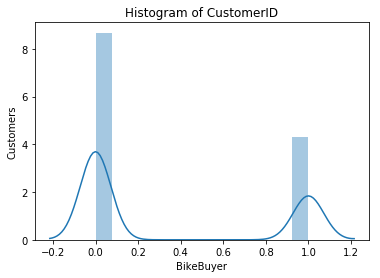

In [17]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('BikeBuyer')
    plt.ylabel('Customers')
    
hist_plot(df4['BikeBuyer'], 'CustomerID')

In [18]:
def count_unique(df4, cols):
    for col in cols:
        print('\n' + 'For Rows ' + col)
        print(df4[col].value_counts())
         
count_unique(df4,['Occupation'])

df4.groupby(['Occupation']).YearlyIncome.median()

# Manual, Clerical, Skilled Manual, Professional, Management


For Rows Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64


Occupation
Clerical           49481.0
Management        118781.0
Manual             21722.0
Professional       99058.0
Skilled Manual     66471.5
Name: YearlyIncome, dtype: float64

In [19]:
from datetime import datetime

def age_customer(dl):
    Db = datetime.strptime(dl, '%Y-%m-%d')
    dl = datetime.strptime('1998-01-01', '%Y-%m-%d').year - Db.year
 
    if dl > 45: return 'Above 55'
    elif 45 < dl <= 55: return 'Between 45 and 55'
    elif 25 < dl <= 45: return 'Between 25 and 45'
    elif 0 < dl <= 25: return 'Under 25'
    else: return 'None'
        
df4['GroupCustomers']  = df4.BirthDate.apply (lambda row: age_customer(row))   

df4.groupby(['GroupCustomers','Gender']).AveMonthSpend.mean()

GroupCustomers     Gender
Above 55           F         54.480505
                   M         84.320550
Between 25 and 45  F         59.814611
                   M         93.367278
Under 25           F         48.403846
                   M         72.955962
Name: AveMonthSpend, dtype: float64

In [20]:
df4.head(5)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,GroupCustomers
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,M,M,1,0,0,2,137947,89,0,Between 25 and 45
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,M,S,0,1,3,3,101141,117,1,Between 25 and 45
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,M,M,1,1,3,3,91945,123,0,Between 25 and 45
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,F,S,0,1,0,0,86688,50,0,Between 25 and 45
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,F,S,1,4,5,5,92771,95,1,Between 25 and 45


In [21]:
print('statement1')
df4.groupby(['MaritalStatus']).AveMonthSpend.median()

statement1


MaritalStatus
M    74
S    62
Name: AveMonthSpend, dtype: int64

In [22]:
print('statement2')
df4.groupby(['NumberCarsOwned']).AveMonthSpend.median()

statement2


NumberCarsOwned
0     65
1     63
2     64
3     92
4    100
Name: AveMonthSpend, dtype: int64

In [23]:
print('statement3')
df4.groupby(['Gender']).AveMonthSpend.median()

statement3


Gender
F    52
M    79
Name: AveMonthSpend, dtype: int64

In [24]:
print('statement4')

df4.groupby(['Gender']).AveMonthSpend.count()



statement4


Gender
F    8114
M    8290
Name: AveMonthSpend, dtype: int64

In [25]:
print('statement5')

df4.groupby(['NumberChildrenAtHome']).AveMonthSpend.mean()


statement5


NumberChildrenAtHome
0     59.793329
1     71.460550
2     83.476289
3     96.858089
4    113.233298
5    127.471006
Name: AveMonthSpend, dtype: float64

In [26]:
df4.head(5)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,GroupCustomers
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,M,M,1,0,0,2,137947,89,0,Between 25 and 45
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,M,S,0,1,3,3,101141,117,1,Between 25 and 45
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,M,M,1,1,3,3,91945,123,0,Between 25 and 45
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,F,S,0,1,0,0,86688,50,0,Between 25 and 45
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,F,S,1,4,5,5,92771,95,1,Between 25 and 45


In [27]:
print('statement1')

df4.groupby(['BikeBuyer']).YearlyIncome.median()

statement1


BikeBuyer
0    65957
1    96084
Name: YearlyIncome, dtype: int64

In [28]:
print('statement2')

df4.groupby(['BikeBuyer']).NumberCarsOwned.median()

statement2


BikeBuyer
0    1
1    2
Name: NumberCarsOwned, dtype: int64

In [29]:
print('statement3')

df4.groupby(['Occupation']).BikeBuyer.count()

statement3


Occupation
Clerical          2597
Management        2718
Manual            2129
Professional      4922
Skilled Manual    4038
Name: BikeBuyer, dtype: int64

In [30]:
print('statement4')

df4.groupby(['Gender']).BikeBuyer.count()

statement4


Gender
F    8114
M    8290
Name: BikeBuyer, dtype: int64

In [31]:
print('statement5')

df4.groupby(['BikeBuyer','MaritalStatus']).MaritalStatus.count()

statement5


BikeBuyer  MaritalStatus
0          M                6653
           S                4296
1          M                2199
           S                3256
Name: MaritalStatus, dtype: int64